In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
data = pd.read_csv('./hotel_bookings.csv')

In [2]:
# select the columns that are relevant to the business question being answered to be displayed
table = data[["hotel", "is_canceled", "stays_in_weekend_nights", "stays_in_week_nights", "country", "adr"]].dropna()

# calculate total nights stayed by each group of guests
table['total_nights'] = table['stays_in_weekend_nights'] + table['stays_in_week_nights']

# remove cancelled bookings
table = table.drop(table[table['is_canceled'] == 1].index)

#calculate total revenue generated from each booking
table['total_revenue'] = table['adr'] * table['total_nights']

#remove rows where total revenue is 0, as that means that 0 nights have been stayed
table = table.drop(table[table['total_revenue'] == 0.00].index)

# separate data by hotel type
data_city_hotel = table[table['hotel'] == 'City Hotel']
data_resort_hotel = table[table['hotel'] == 'Resort Hotel']

In [3]:
data_city_hotel

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,country,adr,total_nights,total_revenue
40069,City Hotel,0.0,0,3,PRT,58.67,3,176.01
40073,City Hotel,0.0,0,2,PRT,86.00,2,172.00
40074,City Hotel,0.0,0,2,PRT,43.00,2,86.00
40075,City Hotel,0.0,0,2,PRT,86.00,2,172.00
40076,City Hotel,0.0,0,2,PRT,63.00,2,126.00
...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,2,5,BEL,96.14,7,672.98
119390,City Hotel,0.0,2,5,FRA,225.43,7,1578.01
119391,City Hotel,0.0,2,5,DEU,157.71,7,1103.97
119392,City Hotel,0.0,2,5,GBR,104.40,7,730.80


In [4]:
data_resort_hotel

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,country,adr,total_nights,total_revenue
2,Resort Hotel,0.0,0,1,GBR,75.00,1,75.00
3,Resort Hotel,0.0,0,1,GBR,75.00,1,75.00
4,Resort Hotel,0.0,0,2,GBR,98.00,2,196.00
5,Resort Hotel,0.0,0,2,GBR,98.00,2,196.00
6,Resort Hotel,0.0,0,2,PRT,107.00,2,214.00
...,...,...,...,...,...,...,...,...
40058,Resort Hotel,0.0,2,8,GBR,89.75,10,897.50
40059,Resort Hotel,0.0,2,9,IRL,202.27,11,2224.97
40060,Resort Hotel,0.0,4,10,IRL,153.57,14,2149.98
40061,Resort Hotel,0.0,4,10,GBR,112.80,14,1579.20


In [5]:
# sum the total revenues generated by guests from each country for each hotel type
revenue_city = data_city_hotel.groupby('country')['total_revenue'].sum().reset_index()
revenue_resort = data_resort_hotel.groupby('country')['total_revenue'].sum().reset_index()

#select the top 10 revenue-generating countries overall
top_countries = pd.concat([revenue_city, revenue_resort]).groupby('country')['total_revenue'].sum().nlargest(10).index

# make separate variables for the top 10 generating countries for each hotel type
top_countries_city = revenue_city[revenue_city['country'].isin(top_countries)]
top_countries_resort = revenue_resort[revenue_resort['country'].isin(top_countries)]

# merge data for both hotel types
merged_top_countries = top_countries_city.merge(top_countries_resort, on = 'country')

# sort the total sum by total revenue, to order values in a descending manner
merged_top_countries['total_revenue_sum'] = merged_top_countries['total_revenue_x'] + merged_top_countries['total_revenue_y']
merged_top_countries = merged_top_countries.sort_values(by='total_revenue_sum', ascending=False)

#convert revenues to millions to align with axis units
merged_top_countries['total_revenue_x'] /= 1e6
merged_top_countries['total_revenue_y'] /= 1e6

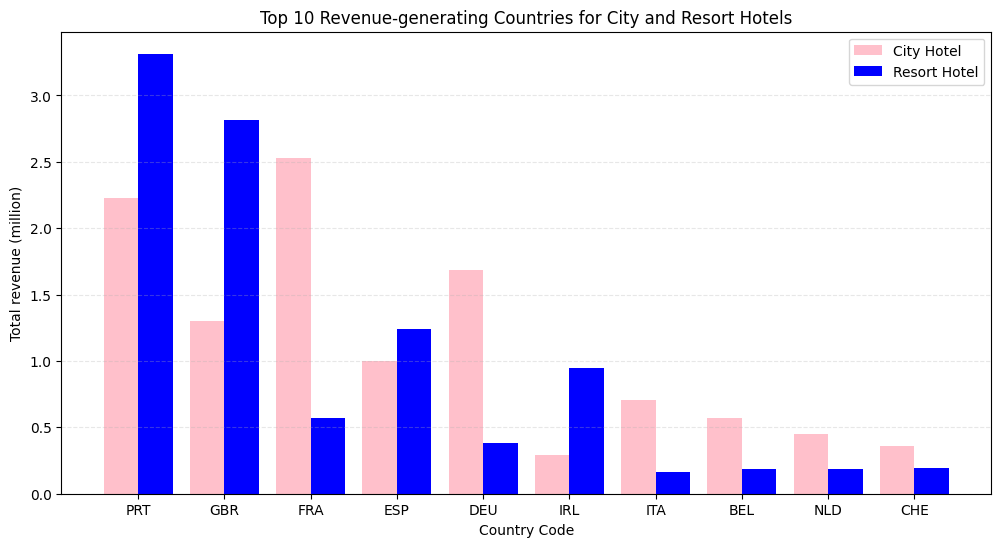

In [6]:
# plot two bar charts, side by side to create a merged bar chart for the 2 hotel types
plt.figure(figsize = (12, 6))
x = range(len(merged_top_countries['country']))
plt.bar(x, merged_top_countries['total_revenue_x'], width = 0.4, label = 'City Hotel', color = 'pink')
plt.bar([i + 0.4 for i in x], merged_top_countries['total_revenue_y'], width = 0.4, label = 'Resort Hotel', color = 'blue')

# formatting for the bar chart
plt.xlabel('Country Code')
plt.ylabel('Total revenue (million)')
plt.title('Top 10 Revenue-generating Countries for City and Resort Hotels')
plt.xticks([i + 0.2 for i in x], merged_top_countries['country'])
plt.legend()
plt.grid(axis='y', linestyle = '--', alpha = 0.3);


Which 10 countries of origin for guests generate the most revenue for the two hotel types?

This is a relevant question for a business as the hotel can concentrate their marketing and advertising in countries that will generate the most revenue for them. This should increase the number of guests from those countries, leading to an increase in total revenue for both hotel types. 

is_cancelled is used to filter out cancelled bookings, as these generate no revenue for hotel stays. The stays in both weekend and week nights are used to calculate the total nights stayed, multiplying total nights with adr to calculate the total revenue generated by each stay. Country provides the country from which the guests have arrived from, providing the basis for the graph. 

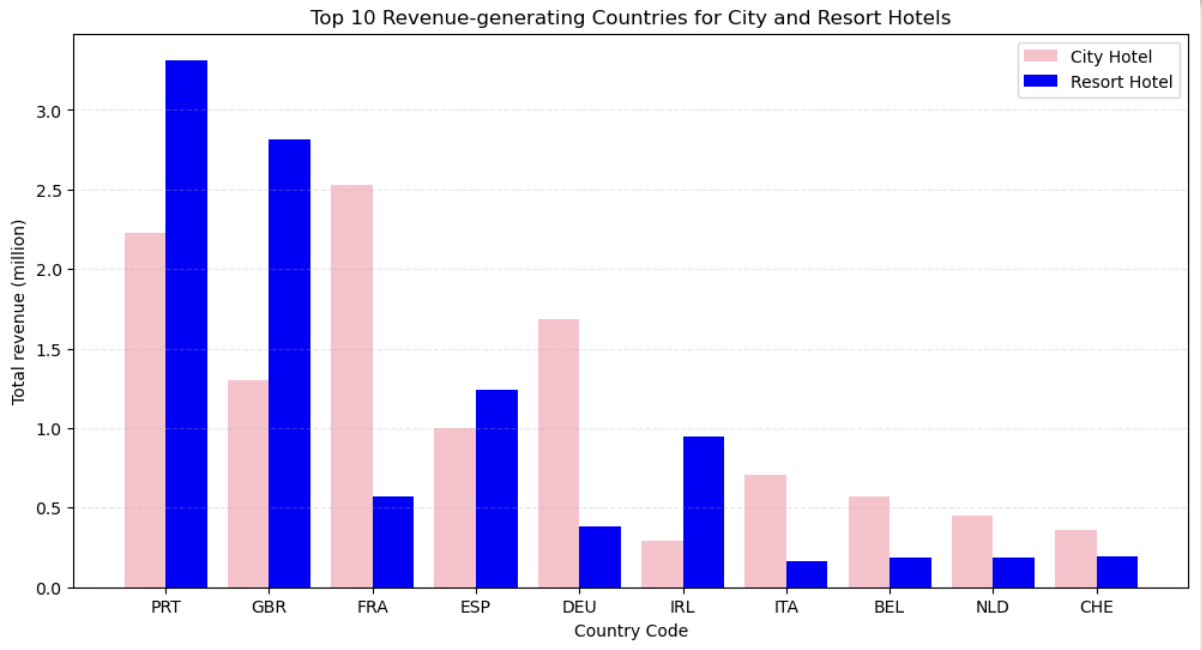

The graph shows the 10 highest revenue-generating countries for both hotel types. The data reveals that the country bringing in the most revenue overall is Portugal, with the highest revenue generated for the resort, while France generates the most revenue for the city. The hotels should tailor their marketing for these countries particularly, as well as the other top 10, as they will be able to encourage more customers to stay in their hotels and generate more revenue. 

Overall mark: 63

#### Business Question:
The business question is clearly stated and is connected to the given dataset. The importance of answering the question to the hotel industry is explained. Evidence is presented to derive the findings and implications, though the analysis is relatively simple.

<u>Very Good</u>

#### Data:
Revelent variables are effectively identified to answer the question. The rationale of choosing each variables is provided, though it is not clear enough. Appropriate data filtering and grouping are used, which shows good understanding of data manipulation. Simple variable transormations to create new variables are also employed to support the analysis.

<u>Good</u>

#### Visualization:
A bar chart is used for the visualization purporse, with essential elements of the title, axis labels and ticks. Necessary legends are also provided. The plot is clear enough to derive the findings, but it is based on relatively basic data analysis. Improvements could include using different plot types to figure out more findings.

<u>Good</u>

#### Code:
The code is error-free and clear, with comments available. Though the coding thechniques used is basic, it is well-organized and sufficient for the analysis.

<u>Very Good</u>